In [1]:
import numpy as np 
import pandas as pd 
import re
import nltk 
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("amazon.txt",delimiter="\t",header=None,names=["sentence","label"])
data.head()

#Confusion Matris çizimi için 
import itertools
classes  = data['label'].unique()
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]        
    else:
        print()

    plt.imshow(cm, interpolation='nearest', cmap=cmap, aspect='auto')
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Gerçek Etiket')
    plt.xlabel('Tahmin Etiket')
    plt.figure(figsize=(150,100))

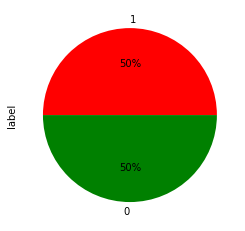

In [3]:
#veri kümesindeki olumlu(yeşil)/olumsuz(kırmızı) yorum dağılımı 
data.label.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["red", "green"])

In [4]:
#Veri ön işleme
sentences = data.iloc[:, 0].values
labels = data.iloc[:, 1].values

processed_sentences = []

for item in range(0, len(sentences)):
    # Özel karakterlerin(noktalama işareti vs) çıkartılması
    processed_sentence = re.sub(r'\W', ' ', str(sentences[item]))

    # tek karakterlerin boşluk ile değiştirilmesi
    processed_sentence= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_sentence)

    # en baştan tek kalan karakterlerin çıkartılması
    processed_sentence = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_sentence) 

    # Birden fazla boşluğun tek boşlukla değiştirilmesi
    processed_sentence = re.sub(r'\s+', ' ', processed_sentence, flags=re.I)

    # b öneklerinin silinmesi
    processed_sentence = re.sub(r'^b\s+', '', processed_sentence)

    # küçük harfe çevirim
    processed_sentence = processed_sentence.lower()

    processed_sentences.append(processed_sentence)

#Ön işleme sonrası örnek bir cümle
print(processed_sentences[0])

so there is no way for me to plug it in here in the us unless go by converter 


In [5]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

#TFIdf yöntemi ile kelimelerin vektörlere dönüşümü. 10000 oluşturulacak vocabulary sınırı, max_df en fazla %80inde geçsin, 
# min_df en az 7 belgede geçsin, ingilizce stopwords çıkartılsın
vectorizer = TfidfVectorizer (max_features=10000, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
processed_sentences = vectorizer.fit_transform(processed_sentences).toarray()

sentence=["It is awesome.Great value good price","it was horrible. never shop again"]
transformed_sentence=vectorizer.transform(sentence).toarray()
print(sentence[0])
print(transformed_sentence[0])

It is awesome.Great value good price
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.53601251 0.         0.49609003 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.68307047
 0.        

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(processed_sentences, labels, test_size=0.1, random_state=0)

**RANDOM FOREST ALGORİTMASI**

It is awesome.Great value good price olumlu
it was horrible. never shop again olumsuz

Doğruluk Değeri= 0.77
Çapraz Doğrulama Değerleri
[0.71 0.81 0.73 0.72 0.73 0.73 0.8  0.72 0.72 0.76]
Çapraz doğrulama değerleri ortalaması 0.7444444444444445


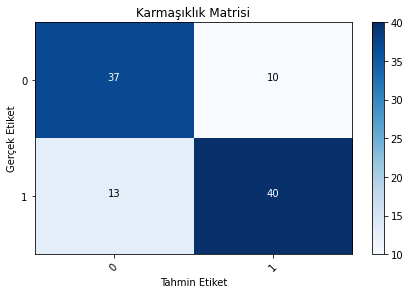

<Figure size 10800x7200 with 0 Axes>

In [7]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=200, random_state=0)
classifier.fit(X_train, y_train)

predictions = classifier.predict(X_test)

prediction=classifier.predict(transformed_sentence)

print(sentence[0],"olumlu" if prediction[0]==1 else "olumsuz")
print(sentence[1],"olumlu" if prediction[1]==1 else "olumsuz")

from sklearn.metrics import confusion_matrix, accuracy_score

#print(confusion_matrix(y_test,predictions))
# confusion matris yazdırma
cnf_matrix = confusion_matrix(y_test, predictions,classes)
np.set_printoptions(precision=2)

class_names = range(0,classes.size)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,title='Karmaşıklık Matrisi')

print("Doğruluk Değeri=",accuracy_score(y_test, predictions))

#k-fold cross validation
from sklearn.model_selection import cross_val_score

score=cross_val_score(classifier, X_train, y_train, cv=10)
print("Çapraz Doğrulama Değerleri")
print(score)
print("Çapraz doğrulama değerleri ortalaması",score.mean())

**SVM ALGORİTMASI**

It is awesome.Great value good price olumlu
it was horrible. never shop again olumsuz

Doğruluk Değeri= 0.81
Çapraz Doğrulama Değerleri
[0.68 0.76 0.78 0.7  0.73 0.74 0.83 0.73 0.73 0.74]
Çapraz doğrulama değerleri ortalaması 0.7433333333333334

It is awesome.Great value good price olumlu
it was horrible. never shop again olumsuz

Doğruluk Değeri= 0.8
Çapraz Doğrulama Değerleri
[0.67 0.76 0.73 0.71 0.72 0.74 0.81 0.77 0.74 0.76]
Çapraz doğrulama değerleri ortalaması 0.7411111111111112


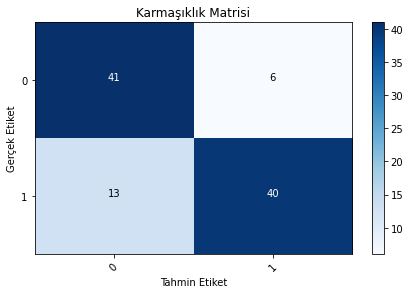

<Figure size 10800x7200 with 0 Axes>

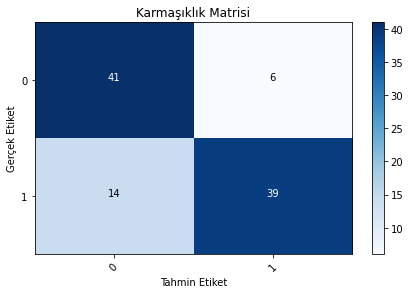

<Figure size 10800x7200 with 0 Axes>

In [8]:
from sklearn.svm import SVC

classifier = SVC(kernel='linear')
classifier.fit(X_train, y_train)

predictions = classifier.predict(X_test)

prediction=classifier.predict(transformed_sentence)

print(sentence[0],"olumlu" if prediction[0]==1 else "olumsuz")
print(sentence[1],"olumlu" if prediction[1]==1 else "olumsuz")

from sklearn.metrics import confusion_matrix, accuracy_score

# confusion matris yazdırma
cnf_matrix = confusion_matrix(y_test, predictions,classes)
np.set_printoptions(precision=2)

class_names = range(0,classes.size)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,title='Karmaşıklık Matrisi')

print("Doğruluk Değeri=",accuracy_score(y_test, predictions))

#k-fold cross validation
from sklearn.model_selection import cross_val_score

score=cross_val_score(classifier, X_train, y_train, cv=10)
print("Çapraz Doğrulama Değerleri")
print(score)
print("Çapraz doğrulama değerleri ortalaması",score.mean())

#Sigmoid Kernel tipi ile deneme
classifier = SVC(kernel='sigmoid')
classifier.fit(X_train, y_train)

predictions = classifier.predict(X_test)
prediction=classifier.predict(transformed_sentence)

print()
print(sentence[0],"olumlu" if prediction[0]==1 else "olumsuz")
print(sentence[1],"olumlu" if prediction[1]==1 else "olumsuz")

from sklearn.metrics import confusion_matrix, accuracy_score

# confusion matris yazdırma
cnf_matrix = confusion_matrix(y_test, predictions,classes)
np.set_printoptions(precision=2)

class_names = range(0,classes.size)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,title='Karmaşıklık Matrisi')

print("Doğruluk Değeri=",accuracy_score(y_test, predictions))

#k-fold cross validation
from sklearn.model_selection import cross_val_score

score=cross_val_score(classifier, X_train, y_train, cv=10)
print("Çapraz Doğrulama Değerleri")
print(score)
print("Çapraz doğrulama değerleri ortalaması",score.mean())


**KNN ALGORİTMASI** 

It is awesome.Great value good price olumlu
it was horrible. never shop again olumsuz

k=5 için değerler
Doğruluk Değeri= 0.77

k=3 için değerler
Doğruluk Değeri= 0.78
Çapraz Doğrulama Değerleri
[0.61 0.7  0.73 0.7  0.67 0.78 0.74 0.62 0.66 0.69]
Çapraz doğrulama değerleri ortalaması 0.6900000000000001


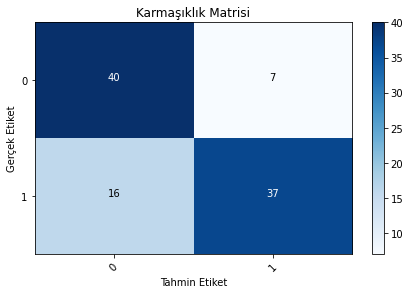

<Figure size 10800x7200 with 0 Axes>

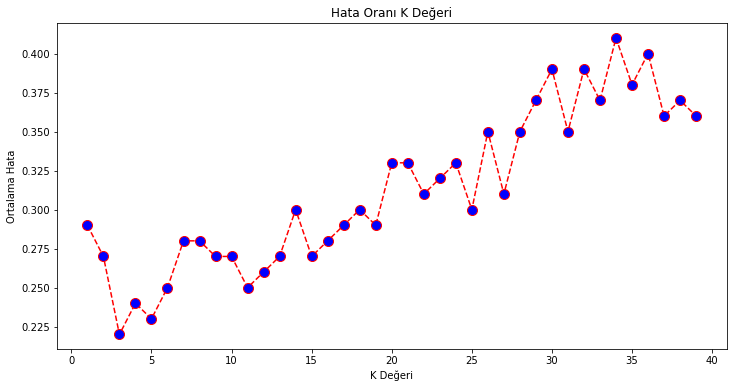

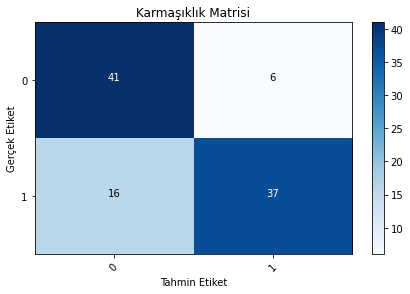

<Figure size 10800x7200 with 0 Axes>

In [9]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

predictions = classifier.predict(X_test)
prediction=classifier.predict(transformed_sentence)

print(sentence[0],"olumlu" if prediction[0]==1 else "olumsuz")
print(sentence[1],"olumlu" if prediction[1]==1 else "olumsuz")

from sklearn.metrics import confusion_matrix, accuracy_score

# confusion matris yazdırma
cnf_matrix = confusion_matrix(y_test, predictions,classes)
np.set_printoptions(precision=2)

class_names = range(0,classes.size)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,title='Karmaşıklık Matrisi')

print("k=5 için değerler")
print("Doğruluk Değeri=",accuracy_score(y_test, predictions))

#k değerini rasgele atamak yerine 1-40 arasındaki k değerleri için hata hesaplaması yapıp grafiğe yansıtalım
error = []
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Hata Oranı K Değeri')
plt.xlabel('K Değeri')
plt.ylabel('Ortalama Hata')    

#k=3 değeri için hata oranı en küçük çıkmış.Algoritmayı k=3 tekrar çalıştıralım
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)

predictions = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score

# confusion matris yazdırma
cnf_matrix = confusion_matrix(y_test, predictions,classes)
np.set_printoptions(precision=2)

class_names = range(0,classes.size)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,title='Karmaşıklık Matrisi')

print("k=3 için değerler")
print("Doğruluk Değeri=",accuracy_score(y_test, predictions))

#k-fold cross validation
from sklearn.model_selection import cross_val_score

score=cross_val_score(classifier, X_train, y_train, cv=10)
print("Çapraz Doğrulama Değerleri")
print(score)
print("Çapraz doğrulama değerleri ortalaması",score.mean())

**LOJİSTİK REGRESYON**

It is awesome.Great value good price olumlu
it was horrible. never shop again olumsuz

Doğruluk Değeri= 0.84
Çapraz Doğrulama Değerleri
[0.61 0.7  0.73 0.7  0.67 0.78 0.74 0.62 0.66 0.69]
Çapraz doğrulama değerleri ortalaması 0.6900000000000001


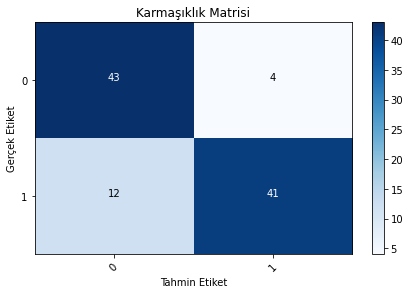

<Figure size 10800x7200 with 0 Axes>

In [10]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr').fit(X_train, y_train)
predictions = lr.predict(X_test)
prediction=classifier.predict(transformed_sentence)

print(sentence[0],"olumlu" if prediction[0]==1 else "olumsuz")
print(sentence[1],"olumlu" if prediction[1]==1 else "olumsuz")

from sklearn.metrics import confusion_matrix, accuracy_score

# confusion matris yazdırma
cnf_matrix = confusion_matrix(y_test, predictions,classes)
np.set_printoptions(precision=2)

class_names = range(0,classes.size)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,title='Karmaşıklık Matrisi')

print("Doğruluk Değeri=",accuracy_score(y_test, predictions))

#k-fold cross validation
from sklearn.model_selection import cross_val_score

score=cross_val_score(classifier, X_train, y_train, cv=10)
print("Çapraz Doğrulama Değerleri")
print(score)
print("Çapraz doğrulama değerleri ortalaması",score.mean())

**NAIVEBAYES ALGORİTMASI**

It is awesome.Great value good price olumlu
it was horrible. never shop again olumsuz

Doğruluk Değeri= 0.71
Çapraz Doğrulama Değerleri
[0.64 0.6  0.66 0.69 0.64 0.69 0.74 0.62 0.64 0.62]
Çapraz doğrulama değerleri ortalaması 0.6555555555555557

It is awesome.Great value good price olumlu
it was horrible. never shop again olumsuz

Doğruluk Değeri= 0.84
Çapraz Doğrulama Değerleri
[0.67 0.72 0.77 0.76 0.7  0.76 0.81 0.81 0.72 0.74]
Çapraz doğrulama değerleri ortalaması 0.7455555555555555

It is awesome.Great value good price olumlu
it was horrible. never shop again olumsuz

Doğruluk Değeri= 0.83
Çapraz Doğrulama Değerleri
[0.66 0.71 0.71 0.73 0.72 0.76 0.86 0.79 0.73 0.77]
Çapraz doğrulama değerleri ortalaması 0.7433333333333334


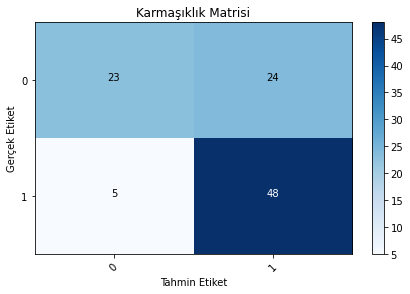

<Figure size 10800x7200 with 0 Axes>

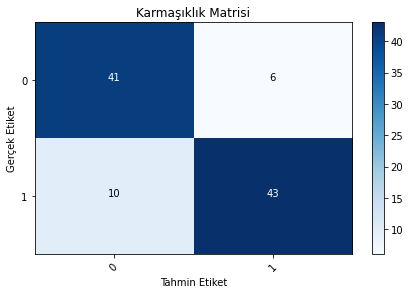

<Figure size 10800x7200 with 0 Axes>

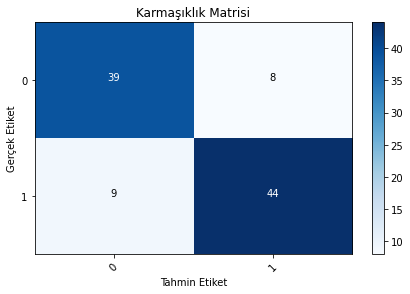

<Figure size 10800x7200 with 0 Axes>

In [11]:
# 3 tane farklı Naive Bayes Sınıfı vardır.
# GaussianNB : Tahmin edeceğiniz veri veya kolon sürekli (real,ondalıklı vs.) ise
# BernoulliNB : Tahmin edeceğiniz veri veya kolon ikili ise ( Evet/Hayır , Sigara içiyor/ İçmiyor vs.)
# MultinomialNB : Tahmin edeceğiniz veri veya kolon nominal ise ( Int sayılar )

from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(X_train, y_train)

predictions = classifier.predict(X_test)
prediction=classifier.predict(transformed_sentence)

print(sentence[0],"olumlu" if prediction[0]==1 else "olumsuz")
print(sentence[1],"olumlu" if prediction[1]==1 else "olumsuz")

from sklearn.metrics import confusion_matrix, accuracy_score

# confusion matris yazdırma
cnf_matrix = confusion_matrix(y_test, predictions,classes)
np.set_printoptions(precision=2)

class_names = range(0,classes.size)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,title='Karmaşıklık Matrisi')

print("Doğruluk Değeri=",accuracy_score(y_test, predictions))

#k-fold cross validation
from sklearn.model_selection import cross_val_score

score=cross_val_score(classifier, X_train, y_train, cv=10)
print("Çapraz Doğrulama Değerleri")
print(score)
print("Çapraz doğrulama değerleri ortalaması",score.mean())

#BernoulliNB
from sklearn.naive_bayes import BernoulliNB

classifier = BernoulliNB()
classifier.fit(X_train, y_train)

predictions = classifier.predict(X_test)
prediction=classifier.predict(transformed_sentence)

print()
print(sentence[0],"olumlu" if prediction[0]==1 else "olumsuz")
print(sentence[1],"olumlu" if prediction[1]==1 else "olumsuz")

from sklearn.metrics import confusion_matrix, accuracy_score

# confusion matris yazdırma
cnf_matrix = confusion_matrix(y_test, predictions,classes)
np.set_printoptions(precision=2)

class_names = range(0,classes.size)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,title='Karmaşıklık Matrisi')

print("Doğruluk Değeri=",accuracy_score(y_test, predictions))

#k-fold cross validation
from sklearn.model_selection import cross_val_score

score=cross_val_score(classifier, X_train, y_train, cv=10)
print("Çapraz Doğrulama Değerleri")
print(score)
print("Çapraz doğrulama değerleri ortalaması",score.mean())

#MultinomialNB
from sklearn.naive_bayes import MultinomialNB

classifier = MultinomialNB()
classifier.fit(X_train, y_train)

predictions = classifier.predict(X_test)
prediction=classifier.predict(transformed_sentence)

print()
print(sentence[0],"olumlu" if prediction[0]==1 else "olumsuz")
print(sentence[1],"olumlu" if prediction[1]==1 else "olumsuz")

from sklearn.metrics import confusion_matrix, accuracy_score

# confusion matris yazdırma
cnf_matrix = confusion_matrix(y_test, predictions,classes)
np.set_printoptions(precision=2)

class_names = range(0,classes.size)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,title='Karmaşıklık Matrisi')

print("Doğruluk Değeri=",accuracy_score(y_test, predictions))

#k-fold cross validation
from sklearn.model_selection import cross_val_score

score=cross_val_score(classifier, X_train, y_train, cv=10)
print("Çapraz Doğrulama Değerleri")
print(score)
print("Çapraz doğrulama değerleri ortalaması",score.mean())

#Sonuç olarak en iyi değeri önceden tahmin edildiği gibi BernoulliNB verdi.